# Libraries

Import the libraries to be used for the model

In [17]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading the file

Read and explore the file

#### Summary of the variables

| var | description | type | code |
|-----------|-------|------|------|
| id_policy | *indentificador de la póliza* | string |- |
|year| *year of contract, 1 to 5* | float | |
|pol_no_claims_discount|  *like point sistems you have in Spain, <br/> you achive a highest number of points <br/> after a while without claims <br/>* | float | |
|pol_coverage  | *cobertura de la póliza*  |string | min  <br/> med1 <br/> med2 <br/> max |
|pol_duration | *antiguedad de la póliza* | integer ||
|pol_sit_duration | *antiguedad de las características de la póliza <br/>* | integer ||
|pol_pay_freq | *frecuencia de pago de la póliza* | string | |
|pol_payd | *pago pay "as you go"* | string | yes <br/> no  <br/> |
|pol_usage |*uso del vehículo* | string | workprivate <br/> retired <br/> professional <br/> alltrips |
|drv_sex1 |*sexo*| string | H <br/> M |  
|drv_age1 |*edad del primer conductor* | float ||
|drv_age_lic1 |*antiguedad de la licencia del primer <br/> conductor*| float ||
|drv_drv2 | *presencia de segundo conductor* | string | Yes <br/> No |
|drv_sex2 | *sexo del segundo conductor* | string | H <br/> M |
|drv_age2 | *edad del segundo conductor* | float ||
|drv_age_lic2 |*antiguedad de la licencia del segundo <br/> conductor*| float || 
|vh_make_model | *modelo del vehículo* | string ||
|vh_age | *antiguedad del vehículo desde el año presente* | string ||
|vh_fuel | *combustible* | string | diesel <br/> gasoline <br/> hybrid <br/>|
|vh_type | *tipo de vehículo* |string| tourism <br/> commercial <br/>|
|vh_speed | *máxima velocidad del vehículo* | float ||
|vh_value | *valor de reemplazo del vehículos* | float ||
|vh_weight | *peso del vehículo en Kg* | float ||
|population | *tamaño de la población donde está <br/> registrada la póliza*| float ||
|town_surface_area| *superfície de la población donde <br/> está registrada la póliza*| float ||
|claim_amount | *cantidad del claim* | float || 

In [31]:
df = pd.read_csv('./files/training.zip', sep = ',', compression = 'zip')
df.head()

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
0,PL000000,1.0,0.332,Med2,5,1,Monthly,No,WorkPrivate,M,35.0,16.0,Yes,F,26.0,1.0,aparvvfowrjncdhp,8.0,Gasoline,Tourism,174.0,11040.0,1143.0,1270.0,33.1,0.0
1,PL042495,1.0,0.000,Med2,6,1,Monthly,No,WorkPrivate,M,60.0,41.0,No,0,NaN,NaN,aparvvfowrjncdhp,10.0,Diesel,Tourism,174.0,11040.0,1143.0,1290.0,51.3,0.0
2,PL042496,1.0,0.196,Med1,2,1,Yearly,Yes,Retired,M,55.0,35.0,Yes,F,57.0,38.0,iwhqpdfuhrsxyqxe,8.0,Diesel,Commercial,150.0,14159.0,1193.0,1020.0,262.8,0.0
3,PL042497,1.0,0.000,Med2,8,5,Yearly,No,WorkPrivate,F,54.0,31.0,No,0,NaN,NaN,kvcddisqpkysmvvo,4.0,Gasoline,Tourism,149.0,17233.0,1012.0,180.0,219.7,0.0
4,PL042498,1.0,0.000,Med1,2,2,Yearly,No,Retired,F,65.0,38.0,No,0,NaN,NaN,tdgkjlphosocwbgu,13.0,Gasoline,Tourism,200.0,19422.0,1315.0,30.0,70.3,0.0


In [52]:
df.columns

Index(['id_policy', 'year', 'pol_no_claims_discount', 'pol_coverage',
       'pol_duration', 'pol_sit_duration', 'pol_pay_freq', 'pol_payd',
       'pol_usage', 'drv_sex1', 'drv_age1', 'drv_age_lic1', 'drv_drv2',
       'drv_sex2', 'drv_age2', 'drv_age_lic2', 'vh_make_model', 'vh_age',
       'vh_fuel', 'vh_type', 'vh_speed', 'vh_value', 'vh_weight', 'population',
       'town_surface_area', 'claim_amount', 'pol_coverage_Max',
       'pol_coverage_Med1', 'pol_coverage_Med2', 'pol_coverage_Min',
       'pol_pay_freq_Biannual', 'pol_pay_freq_Monthly',
       'pol_pay_freq_Quarterly', 'pol_pay_freq_Yearly', 'pol_payd_No',
       'pol_payd_Yes', 'pol_usage_AllTrips', 'pol_usage_Professional',
       'pol_usage_Retired', 'pol_usage_WorkPrivate', 'drv_sex1_F',
       'drv_sex1_M', 'drv_sex2_0', 'drv_sex2_F', 'drv_sex2_M',
       'vh_fuel_Diesel', 'vh_fuel_Gasoline', 'vh_fuel_Hybrid',
       'vh_type_Commercial', 'vh_type_Tourism', 'claim'],
      dtype='object')

In [3]:
df.shape

(228216, 26)

In [33]:
df = df.merge(pd.get_dummies(df[dummy_list]), right_index = True, left_index = True)
df.head()

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount,pol_coverage_Max,pol_coverage_Med1,pol_coverage_Med2,pol_coverage_Min,pol_pay_freq_Biannual,pol_pay_freq_Monthly,pol_pay_freq_Quarterly,pol_pay_freq_Yearly,pol_payd_No,pol_payd_Yes,pol_usage_AllTrips,pol_usage_Professional,pol_usage_Retired,pol_usage_WorkPrivate,drv_sex1_F,drv_sex1_M,drv_sex2_0,drv_sex2_F,drv_sex2_M,vh_fuel_Diesel,vh_fuel_Gasoline,vh_fuel_Hybrid,vh_type_Commercial,vh_type_Tourism
0,PL000000,1.0,0.332,Med2,5,1,Monthly,No,WorkPrivate,M,35.0,16.0,Yes,F,26.0,1.0,aparvvfowrjncdhp,8.0,Gasoline,Tourism,174.0,11040.0,1143.0,1270.0,33.1,0.0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1
1,PL042495,1.0,0.000,Med2,6,1,Monthly,No,WorkPrivate,M,60.0,41.0,No,0,NaN,NaN,aparvvfowrjncdhp,10.0,Diesel,Tourism,174.0,11040.0,1143.0,1290.0,51.3,0.0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1
2,PL042496,1.0,0.196,Med1,2,1,Yearly,Yes,Retired,M,55.0,35.0,Yes,F,57.0,38.0,iwhqpdfuhrsxyqxe,8.0,Diesel,Commercial,150.0,14159.0,1193.0,1020.0,262.8,0.0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0
3,PL042497,1.0,0.000,Med2,8,5,Yearly,No,WorkPrivate,F,54.0,31.0,No,0,NaN,NaN,kvcddisqpkysmvvo,4.0,Gasoline,Tourism,149.0,17233.0,1012.0,180.0,219.7,0.0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1
4,PL042498,1.0,0.000,Med1,2,2,Yearly,No,Retired,F,65.0,38.0,No,0,NaN,NaN,tdgkjlphosocwbgu,13.0,Gasoline,Tourism,200.0,19422.0,1315.0,30.0,70.3,0.0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1


In [34]:
df.shape

(228216, 50)

# Data cleaning

In [40]:
df['claim'] = df['claim_amount'].apply(lambda x: 0 if x == 0.0 else 1)

In [55]:
dummy_list = ['pol_coverage','pol_pay_freq','pol_payd','pol_usage','drv_sex1','drv_sex2',
             'vh_fuel','vh_type']
corr_dummies = ['pol_coverage_Max',  'pol_coverage_Med1', 'pol_coverage_Med2', 'pol_coverage_Min',
'pol_pay_freq_Biannual', 'pol_pay_freq_Monthly','pol_pay_freq_Quarterly', 
'pol_pay_freq_Yearly', 'pol_payd_No', 'pol_payd_Yes', 'pol_usage_AllTrips',
'pol_usage_Professional','pol_usage_Retired', 'pol_usage_WorkPrivate', 'drv_sex1_F',
'drv_sex1_M', 'drv_sex2_0', 'drv_sex2_F', 'drv_sex2_M','vh_fuel_Diesel', 'vh_fuel_Gasoline', 
'vh_fuel_Hybrid', 'vh_type_Commercial', 'vh_type_Tourism', 'claim_amount']
float_list = ['year','pol_no_claims_discount','pol_duration','pol_sit_duration','drv_age1', 'drv_age_lic1',
              'drv_age2','drv_age_lic2','vh_age','vh_speed','vh_value','vh_weight','population',
              'town_surface_area','claim_amount']
float_list2 =  ['year','pol_no_claims_discount','pol_duration','pol_sit_duration','drv_age1', 'drv_age_lic1',
              'drv_age2','drv_age_lic2','vh_age','vh_speed','vh_value','vh_weight','population',
              'town_surface_area','claim_amount','claim']

# EDA 

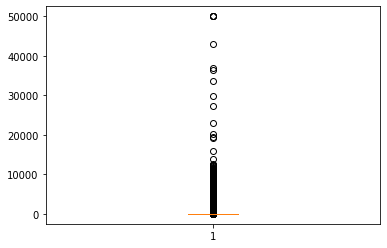

In [44]:
plt.boxplot(df['claim_amount'])
plt.show()

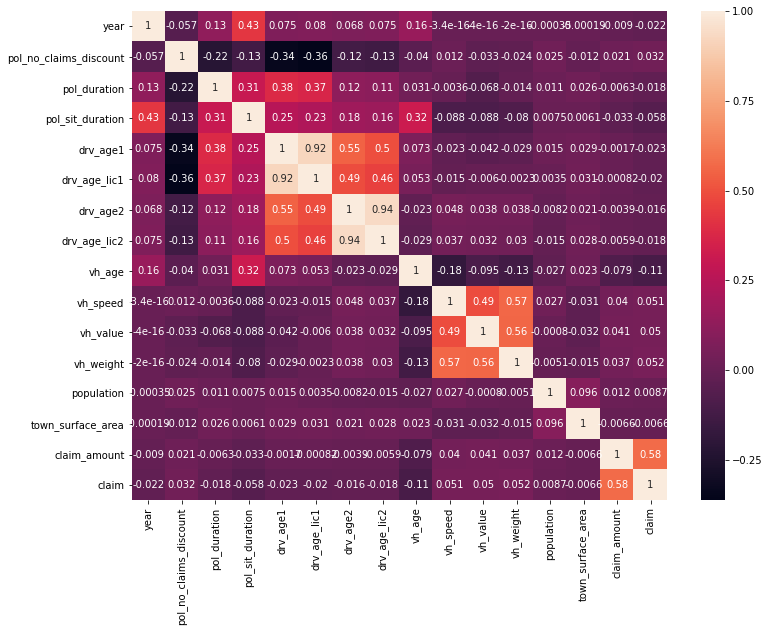

In [45]:
fig, ax = plt.subplots(figsize=(12,9)) 
ax = sns.heatmap(df[float_list2].corr(), annot = True)

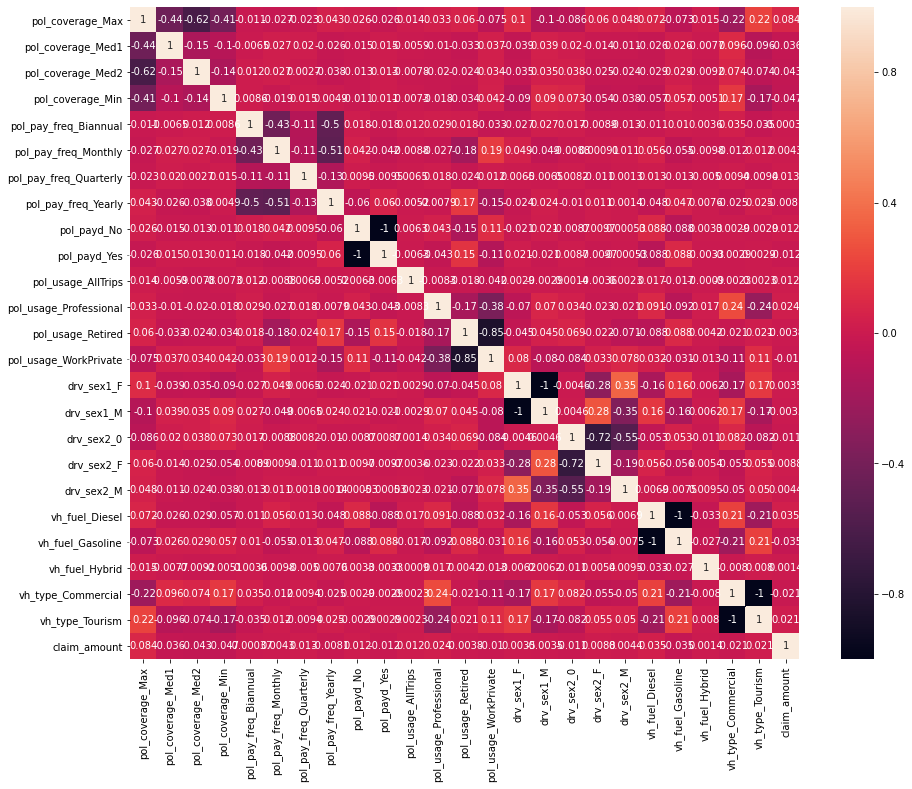

In [60]:
fig, ax = plt.subplots(figsize = (15,12))
ax = sns.heatmap(df[corr_dummies].corr(), annot = True)

In [61]:
# Transforming the dependent variable
# Standarization - media 0 y desviación típica 1 preprocessing.StandardScaler().fit(X_train)
# Min-Max scaler - estandarización de los atributos entre un número x y otro y preprocessing.MinMaxScaler() - puede ser 0 a 1 o -1 a 1 preprocessing.MaxAbsScaler()
# Robust scaling 

In [63]:
df.head()

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount,pol_coverage_Max,pol_coverage_Med1,pol_coverage_Med2,pol_coverage_Min,pol_pay_freq_Biannual,pol_pay_freq_Monthly,pol_pay_freq_Quarterly,pol_pay_freq_Yearly,pol_payd_No,pol_payd_Yes,pol_usage_AllTrips,pol_usage_Professional,pol_usage_Retired,pol_usage_WorkPrivate,drv_sex1_F,drv_sex1_M,drv_sex2_0,drv_sex2_F,drv_sex2_M,vh_fuel_Diesel,vh_fuel_Gasoline,vh_fuel_Hybrid,vh_type_Commercial,vh_type_Tourism,claim
0,PL000000,1.0,0.332,Med2,5,1,Monthly,No,WorkPrivate,M,35.0,16.0,Yes,F,26.0,1.0,aparvvfowrjncdhp,8.0,Gasoline,Tourism,174.0,11040.0,1143.0,1270.0,33.1,0.0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0
1,PL042495,1.0,0.000,Med2,6,1,Monthly,No,WorkPrivate,M,60.0,41.0,No,0,NaN,NaN,aparvvfowrjncdhp,10.0,Diesel,Tourism,174.0,11040.0,1143.0,1290.0,51.3,0.0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0
2,PL042496,1.0,0.196,Med1,2,1,Yearly,Yes,Retired,M,55.0,35.0,Yes,F,57.0,38.0,iwhqpdfuhrsxyqxe,8.0,Diesel,Commercial,150.0,14159.0,1193.0,1020.0,262.8,0.0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0
3,PL042497,1.0,0.000,Med2,8,5,Yearly,No,WorkPrivate,F,54.0,31.0,No,0,NaN,NaN,kvcddisqpkysmvvo,4.0,Gasoline,Tourism,149.0,17233.0,1012.0,180.0,219.7,0.0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0
4,PL042498,1.0,0.000,Med1,2,2,Yearly,No,Retired,F,65.0,38.0,No,0,NaN,NaN,tdgkjlphosocwbgu,13.0,Gasoline,Tourism,200.0,19422.0,1315.0,30.0,70.3,0.0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0


# Transforming variables 

In [64]:
from sklearn import preprocessing 

In [65]:
df.head()

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount,pol_coverage_Max,pol_coverage_Med1,pol_coverage_Med2,pol_coverage_Min,pol_pay_freq_Biannual,pol_pay_freq_Monthly,pol_pay_freq_Quarterly,pol_pay_freq_Yearly,pol_payd_No,pol_payd_Yes,pol_usage_AllTrips,pol_usage_Professional,pol_usage_Retired,pol_usage_WorkPrivate,drv_sex1_F,drv_sex1_M,drv_sex2_0,drv_sex2_F,drv_sex2_M,vh_fuel_Diesel,vh_fuel_Gasoline,vh_fuel_Hybrid,vh_type_Commercial,vh_type_Tourism,claim
0,PL000000,1.0,0.332,Med2,5,1,Monthly,No,WorkPrivate,M,35.0,16.0,Yes,F,26.0,1.0,aparvvfowrjncdhp,8.0,Gasoline,Tourism,174.0,11040.0,1143.0,1270.0,33.1,0.0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0
1,PL042495,1.0,0.000,Med2,6,1,Monthly,No,WorkPrivate,M,60.0,41.0,No,0,NaN,NaN,aparvvfowrjncdhp,10.0,Diesel,Tourism,174.0,11040.0,1143.0,1290.0,51.3,0.0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0
2,PL042496,1.0,0.196,Med1,2,1,Yearly,Yes,Retired,M,55.0,35.0,Yes,F,57.0,38.0,iwhqpdfuhrsxyqxe,8.0,Diesel,Commercial,150.0,14159.0,1193.0,1020.0,262.8,0.0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0
3,PL042497,1.0,0.000,Med2,8,5,Yearly,No,WorkPrivate,F,54.0,31.0,No,0,NaN,NaN,kvcddisqpkysmvvo,4.0,Gasoline,Tourism,149.0,17233.0,1012.0,180.0,219.7,0.0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0
4,PL042498,1.0,0.000,Med1,2,2,Yearly,No,Retired,F,65.0,38.0,No,0,NaN,NaN,tdgkjlphosocwbgu,13.0,Gasoline,Tourism,200.0,19422.0,1315.0,30.0,70.3,0.0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0


In [115]:
df['scaler'] = preprocessing.StandardScaler().fit_transform(df[['claim_amount']])
df['scaler2'] = preprocessing.StandardScaler(with_mean=False).fit_transform(df[['claim_amount']])
df['scaler3'] = preprocessing.StandardScaler(with_std=False).fit_transform(df[['claim_amount']])
df['min_max'] = preprocessing.MinMaxScaler().fit_transform(df[['claim_amount']])
df['max_abs'] = preprocessing.MaxAbsScaler().fit_transform(df[['claim_amount']])
df['rb_scaler'] = preprocessing.RobustScaler().fit_transform(df[['claim_amount']])
df['qt_transformer'] = preprocessing.QuantileTransformer().fit_transform(df[['claim_amount']])
df['pw_transformer'] = preprocessing.PowerTransformer().fit_transform(df[['claim_amount']])
df['normalize'] = preprocessing.Normalizer().fit_transform(df[['claim_amount']])

In [116]:
df.head()

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount,pol_coverage_Max,pol_coverage_Med1,pol_coverage_Med2,pol_coverage_Min,pol_pay_freq_Biannual,pol_pay_freq_Monthly,pol_pay_freq_Quarterly,pol_pay_freq_Yearly,pol_payd_No,pol_payd_Yes,pol_usage_AllTrips,pol_usage_Professional,pol_usage_Retired,pol_usage_WorkPrivate,drv_sex1_F,drv_sex1_M,drv_sex2_0,drv_sex2_F,drv_sex2_M,vh_fuel_Diesel,vh_fuel_Gasoline,vh_fuel_Hybrid,vh_type_Commercial,vh_type_Tourism,claim,scaler,scaler2,scaler3,min_max,max_abs,rb_scaler,qt_transformer,pw_transformer,normalize
0,PL000000,1.0,0.332,Med2,5,1,Monthly,No,WorkPrivate,M,35.0,16.0,Yes,F,26.0,1.0,aparvvfowrjncdhp,8.0,Gasoline,Tourism,174.0,11040.0,1143.0,1270.0,33.1,0.0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,-0.194435,0.0,-113.093451,0.0,0.0,0.0,0.0,-0.337092,0.0
1,PL042495,1.0,0.000,Med2,6,1,Monthly,No,WorkPrivate,M,60.0,41.0,No,0,NaN,NaN,aparvvfowrjncdhp,10.0,Diesel,Tourism,174.0,11040.0,1143.0,1290.0,51.3,0.0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,-0.194435,0.0,-113.093451,0.0,0.0,0.0,0.0,-0.337092,0.0
2,PL042496,1.0,0.196,Med1,2,1,Yearly,Yes,Retired,M,55.0,35.0,Yes,F,57.0,38.0,iwhqpdfuhrsxyqxe,8.0,Diesel,Commercial,150.0,14159.0,1193.0,1020.0,262.8,0.0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,-0.194435,0.0,-113.093451,0.0,0.0,0.0,0.0,-0.337092,0.0
3,PL042497,1.0,0.000,Med2,8,5,Yearly,No,WorkPrivate,F,54.0,31.0,No,0,NaN,NaN,kvcddisqpkysmvvo,4.0,Gasoline,Tourism,149.0,17233.0,1012.0,180.0,219.7,0.0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,-0.194435,0.0,-113.093451,0.0,0.0,0.0,0.0,-0.337092,0.0
4,PL042498,1.0,0.000,Med1,2,2,Yearly,No,Retired,F,65.0,38.0,No,0,NaN,NaN,tdgkjlphosocwbgu,13.0,Gasoline,Tourism,200.0,19422.0,1315.0,30.0,70.3,0.0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,-0.194435,0.0,-113.093451,0.0,0.0,0.0,0.0,-0.337092,0.0


In [117]:
df.describe()

,year,pol_no_claims_discount,pol_duration,pol_sit_duration,drv_age1,drv_age_lic1,drv_age2,drv_age_lic2,vh_age,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount,pol_coverage_Max,pol_coverage_Med1,pol_coverage_Med2,pol_coverage_Min,pol_pay_freq_Biannual,pol_pay_freq_Monthly,pol_pay_freq_Quarterly,pol_pay_freq_Yearly,pol_payd_No,pol_payd_Yes,pol_usage_AllTrips,pol_usage_Professional,pol_usage_Retired,pol_usage_WorkPrivate,drv_sex1_F,drv_sex1_M,drv_sex2_0,drv_sex2_F,drv_sex2_M,vh_fuel_Diesel,vh_fuel_Gasoline,vh_fuel_Hybrid,vh_type_Commercial,vh_type_Tourism,claim,scaler,scaler2,scaler3,min_max,max_abs,rb_scaler,qt_transformer,pw_transformer,normalize
count,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,75320.000000,75320.000000,228212.000000,225664.000000,225664.000000,225664.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,2.282160e+05,228216.000000,2.282160e+05,228216.000000,228216.000000,228216.000000,228216.000000,2.282160e+05,228216.000000
mean,2.500000,0.044383,12.608651,4.245049,56.339328,34.132366,48.569888,26.686564,11.139774,170.946434,17699.659476,1098.728924,570.630850,205.036609,113.093451,0.642006,0.095488,0.175588,0.086918,0.293341,0.307437,0.027426,0.371797,0.958285,0.041715,0.000911,0.070302,0.271620,0.657167,0.395888,0.604112,0.669962,0.201458,0.128580,0.543082,0.456024,0.000894,0.099555,0.900445,0.102061,9.216226e-15,0.194435,1.040611e-11,0.002262,0.002262,113.093451,0.096939,-4.142927e-15,0.102061
std,1.118036,0.118354,8.638768,2.622117,14.978742,13.901112,16.338162,14.943528,7.135487,25.550016,10535.606269,397.594911,673.142877,163.295454,581.652385,0.479411,0.293889,0.380470,0.281715,0.455294,0.461433,0.163321,0.483286,0.199937,0.199937,0.030176,0.255656,0.444796,0.474657,0.489042,0.489042,0.470228,0.401090,0.334735,0.498142,0.498063,0.029885,0.299406,0.299406,0.302729,1.000002e+00,1.000002,5.816524e+02,0.011633,0.011633,581.652385,0.287687,1.000002e+00,0.302729
min,1.000000,0.000000,1.000000,1.000000,19.000000,1.000000,18.000000,1.000000,1.000000,95.000000,1113.000000,0.000000,0.000000,18.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.944352e-01,0.000000,-1.130935e+02,0.000000,0.000000,0.000000,0.000000,-3.370923e-01,0.000000
25%,1.750000,0.000000,5.000000,3.000000,45.000000,24.000000,36.000000,15.000000,6.000000,155.000000,11490.000000,950.000000,170.000000,82.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.944352e-01,0.000000,-1.130935e+02,0.000000,0.000000,0.000000,0.000000,-3.370923e-01,0.000000
50%,2.500000,0.000000,11.000000,4.000000,56.000000,34.000000,47.000000,25.000000,10.000000,174.000000,16321.000000,1145.000000,320.000000,155.100000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.944352e-01,0.000000,-1.130935e+02,0.000000,0.000000,0.000000,0.000000,-3.370923e-01,0.000000
75%,3.250000,0.000000,18.000000,5.000000,67.000000,44.000000,61.000000,38.000000,15.000000,183.000000,22067.000000,1315.000000,610.000000,288.100000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.

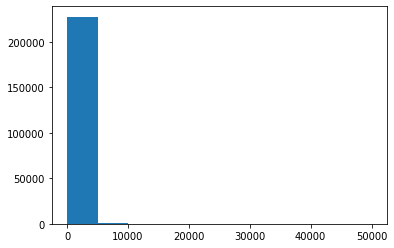

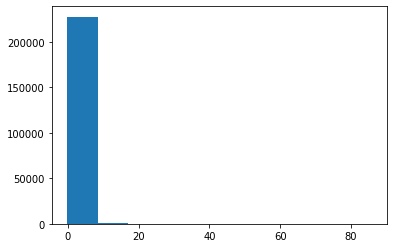

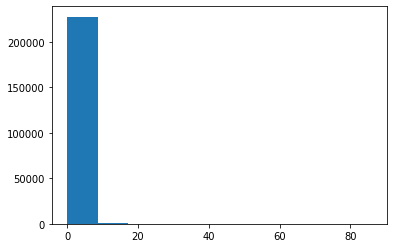

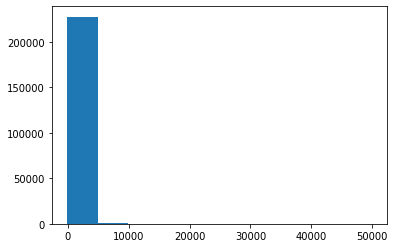

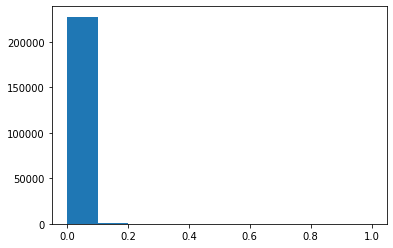

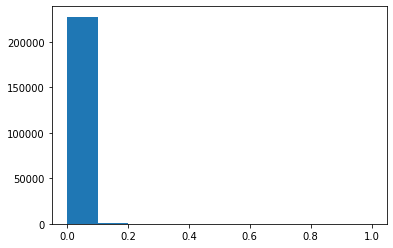

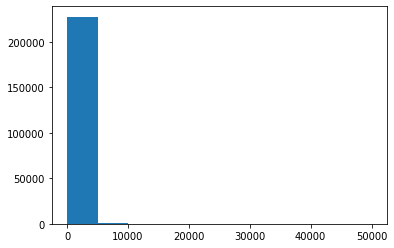

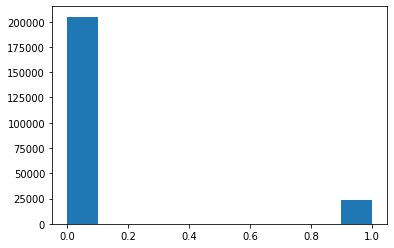

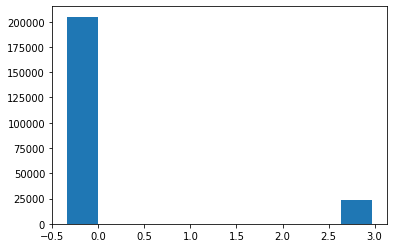

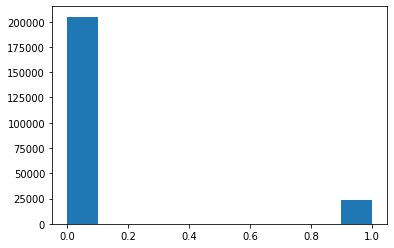

In [130]:
plot_list = ['claim_amount','scaler','scaler2','scaler3','min_max','max_abs','rb_scaler','qt_transformer','pw_transformer','normalize']

for plot in plot_list: 
    plt.hist(df[plot])
    plt.show()

# Sources 
http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html <br/>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer